<a href="https://colab.research.google.com/github/paulohenrique1303/Classification-Model/blob/main/Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fazer de análise e ajuste de dados

In [2]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)

dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
dados['modelo_aleatorio'] = dados.idade_do_modelo + np.random.randint(-2,3, size= 10000)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo_aleatorio
0,30941.02,1,18,35085.22134,20
1,40557.96,1,20,12622.05362,19
2,89627.50,0,12,11440.79806,13
3,95276.14,0,3,43167.32682,2
4,117384.68,1,4,12770.11290,5


In [4]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [5]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, test_size= 0.25, stratify= y) 

In [6]:
from sklearn.dummy import DummyClassifier

np.random.seed(0)
dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dummy = dummy.score(teste_x, teste_y)


print(f'A ACURÁCIA DO DUMMY FOI DE {acuracia_dummy * 100 :.2f}%')

A ACURÁCIA DO DUMMY FOI DE 58.00%


# Grid Search

Nesse metodo são testados todos os valores possiveis entre os parametros, com a finalidade de analisar os parametros com a melhor acuracia. Ponto negativo:
O tempo de execusão.

##Teste com um unico hiper parâmetro

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GroupKFold
import seaborn as sns

def acuracia_max_depth(inicio, fim):

    dic = {
            'max_depth': [],
            'acuracia': []
        }

    for i in range(inicio, fim):

        np.random.seed(0)

        modelo = DecisionTreeClassifier(max_depth= i)
        modelo.fit(treino_x, treino_y)

        cv = GroupKFold(n_splits= 10)

        resultado =cross_val_score(modelo,x, y, cv= cv, groups= dados.modelo_aleatorio)
        acuracia = resultado.mean()
        desvio_padrao = resultado.std()

        dic['max_depth'].append(i)
        dic['acuracia'].append(acuracia)

    df_max_depth = pd.DataFrame(dic)
    display(df_max_depth.sort_values('acuracia', ascending= False))

    sns.lineplot(x = df_max_depth['max_depth'], y= df_max_depth['acuracia'] )

,max_depth,acuracia
2,3,0.786897
4,5,0.786280
3,4,0.786202
5,6,0.784975
6,7,0.782792
7,8,0.779898
8,9,0.774770
9,10,0.770122
10,11,0.764695
11,12,0.764055


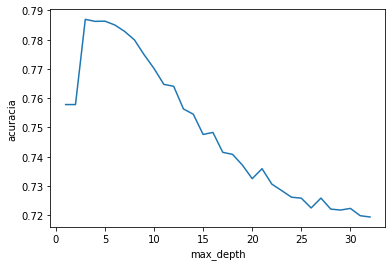

In [8]:
acuracia_max_depth(1,33)

## Teste com dois Hiper Parâmetros

Criei um função para testar 2 hiper parâmetros, e aqui ja vemos o problema do metodo grid search, que é justamente o tempo. Para isso os valores testados no min_samples_leaf foram apenas 5. 

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GroupKFold, cross_validate

def acuracia_max_depth_min_samples(max_depth):

    dic = {
            'max_depth': [],
           'mini_samples_leaf': [],
            'acuracia_train': [],
           'acuracia_test': []
        }

    for i in range(1, max_depth):
        for a in [50,100,200,250,300]:
            np.random.seed(0)

            modelo = DecisionTreeClassifier(max_depth= i, min_samples_leaf= a)
            modelo.fit(treino_x, treino_y)

            cv = GroupKFold(n_splits= 10)

            resultado = cross_validate(modelo,x, y, cv= cv, groups= dados.modelo_aleatorio, return_train_score= True)
            acuracia_test = resultado['test_score'].mean()
            acuracia_train = resultado['train_score'].mean()

            dic['max_depth'].append(i)
            dic['mini_samples_leaf'].append(a)
            dic['acuracia_train'].append(acuracia_train)
            dic['acuracia_test'].append(acuracia_test)

    df_max_depth = pd.DataFrame(dic)
    return df_max_depth


In [10]:
df_hiperparametros = acuracia_max_depth_min_samples(32)
df_hiperparametros.sort_values('acuracia_test', ascending = False,)

,max_depth,mini_samples_leaf,acuracia_train,acuracia_test
19,4,300,0.787033,0.787098
14,3,300,0.787033,0.787098
10,3,50,0.787511,0.786999
18,4,250,0.787511,0.786999
17,4,200,0.787511,0.786999
...,...,...,...,...
6,2,100,0.757911,0.757810
7,2,200,0.757911,0.757810
9,2,300,0.757911,0.757810
1,1,100,0.757911,0.757810


In [11]:
df_hiperparametros = acuracia_max_depth_min_samples(32)
corr = df_hiperparametros.corr()
corr

,max_depth,mini_samples_leaf,acuracia_train,acuracia_test
max_depth,1.000000e+00,1.432515e-16,0.494843,0.114161
mini_samples_leaf,1.432515e-16,1.000000e+00,-0.366162,0.404622
acuracia_train,4.948427e-01,-3.661620e-01,1.000000,0.443582
acuracia_test,1.141613e-01,4.046219e-01,0.443582,1.000000


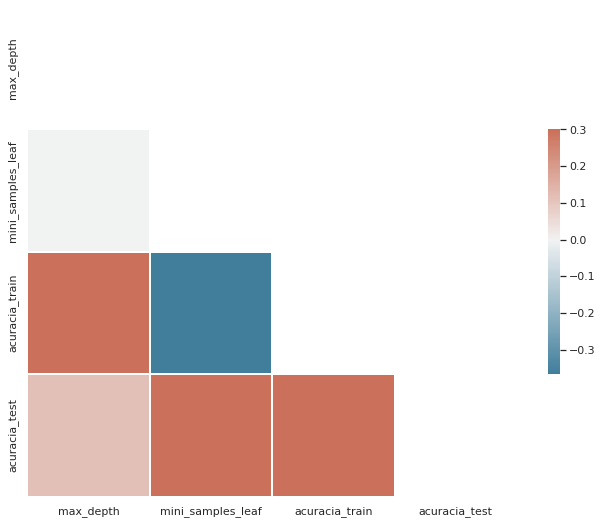

In [12]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

corr = df_hiperparametros.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

##Função GridSearchCV

Ja existe uma função do sklearn que ja faz o metodo do grid search.
Definimos um dicionario com as chaves sendo o nome dos hiper parametros, e o valor dessa chaves sendo os valores a serem testados. Nesse caso coloquei os valores de 10 em 10 para minimizar o tempo de execução.

In [13]:
def imprime_acuracia_cv(resultados):
    print(f'A acuracia média foi de: {resultados.mean() * 100 :.2f}%, [{(resultados.mean() - 2 * resultados.std()) * 100 :.2f}, {(resultados.mean() + 2 * resultados.std()) * 100 :.2f}]')


In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 

np.random.seed(0)

grid = {
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4],
    'min_samples_split': [120,240,480],
    'min_samples_leaf': [120,240,480]
}

modelo = GridSearchCV(DecisionTreeClassifier(), grid, cv = KFold(n_splits= 10, shuffle = True))

modelo.fit(treino_x, treino_y)

print(f'A acuracia com grid searach cv sem nested cross validation foi:{modelo.score(teste_x, teste_y) * 100 :.2f}%, com os parâmetros: {modelo.best_estimator_}')


A acuracia com grid searach cv sem nested cross validation foi:78.84%, com os parâmetros: DecisionTreeClassifier(max_depth=3, min_samples_leaf=120, min_samples_split=120)


In [15]:
#Nested cross validation

score = cross_val_score(modelo, x, y, cv= KFold(n_splits= 10, shuffle= True))
imprime_acuracia_cv(score)
print(modelo.best_estimator_) 

A acuracia média foi de: 78.70%, [76.40, 81.00]
DecisionTreeClassifier(max_depth=3, min_samples_leaf=120, min_samples_split=120)


No nested cross validation as estimativas são mais realistas pelo fato do treino não ficar "viciados" no dados. 

A desvantagem do grid search é justamente o tempo de processamento, e para contornar esse problema existe o random search, que é uma tecnica que utiliza valores randomicos.

Visualização da árvore

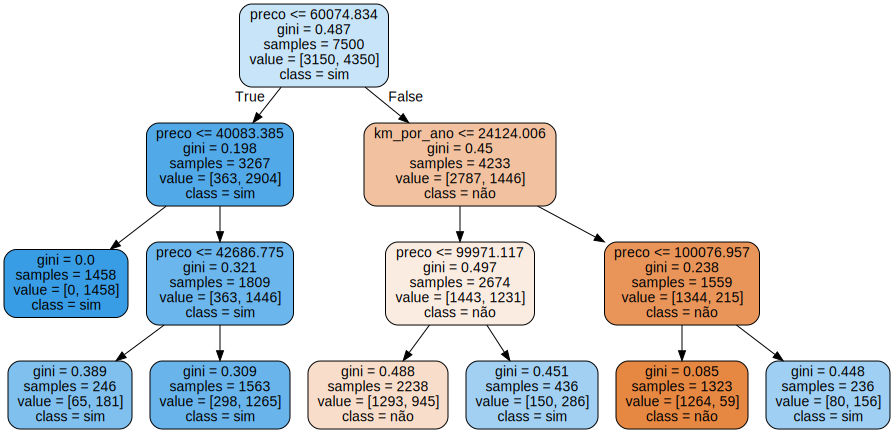

In [16]:
from sklearn.tree import export_graphviz
import graphviz

grafico_dot = export_graphviz(modelo.best_estimator_, feature_names= x.columns, filled= True,
                              rounded= True, class_names= ['não', 'sim'])

grafico = graphviz.Source(grafico_dot)
grafico

# RandomizedSearchCV

Busca aleatória de parâmetros dentro de um espaço, com um número n de interações definidas. Assim é possivel testar valores diversos sem percorrer todos os itens do grid.

In [20]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint

np.random.seed(0)

hiper_parametros = {
    'max_depth': [3,4],
    'min_samples_split': randint(256,1000),
    'min_samples_leaf': randint(256,1000)
}

clf = DecisionTreeClassifier()

modelo = RandomizedSearchCV(clf, hiper_parametros, cv = KFold(n_splits= 10, shuffle= True), n_iter= 64,
                      return_train_score= True, verbose= True, n_jobs= -1, scoring = 'accuracy' )

modelo.fit(treino_x, treino_y)

print(f'A acurácia do randomized search cv sem nested cross validation foi de: {modelo.best_score_ * 100 :.2f}%, com os melhores parametros: {modelo.best_estimator_}')

Fitting 10 folds for each of 64 candidates, totalling 640 fits
A acurácia do randomized search cv sem nested cross validation foi de: 77.81,com os melhores parametros: DecisionTreeClassifier(max_depth=4, min_samples_leaf=267, min_samples_split=563)


In [18]:
#Nested cross validation

score = cross_val_score(modelo, x, y, cv= KFold(n_splits= 10, shuffle= True))
imprime_acuracia_cv(score)
print(modelo.best_estimator_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
Fitting 10 folds for each of 64 candidates, totalling 640 fits
A acuracia média foi de: 78.71%, [75.79, 81.63]
DecisionTreeClassifier(max_depth=4, min_samples_leaf=267, min_samples_split=563)


Visualização da árvore

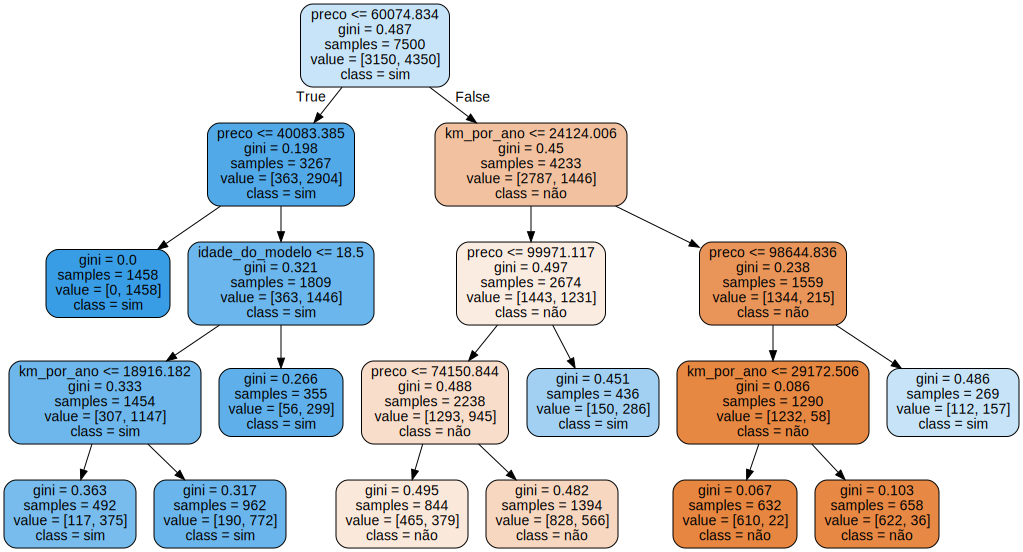

In [19]:
from sklearn.tree import export_graphviz
import graphviz

grafico_dot = export_graphviz(modelo.best_estimator_, feature_names= x.columns, filled= True,
                              rounded= True, class_names= ['não', 'sim'])

grafico = graphviz.Source(grafico_dot)
grafico

# BayesSearchCV

Utilizando o classifidador de RandomForestClassifier

In [34]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 

grid = {
    'bootstrap': Categorical([True, False]),
    'max_depth': Integer(2,32),
    'max_features': Categorical(['auto', 'sqrt', 'log2']),
    'n_estimators': Integer(50,250),
    'min_samples_split': Integer(100,1000),
    'min_samples_leaf': Integer(100,1000),
}

modelo = BayesSearchCV(RandomForestClassifier(), grid, scoring = 'accuracy', 
                       n_jobs= -1, cv= KFold(n_splits= 10, shuffle= True), n_iter= 65)

modelo.fit(treino_x, treino_y)

modelo.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=15, min_samples_leaf=100,
                       min_samples_split=515, n_estimators=50)

In [35]:
modelo.best_score_

0.778

In [36]:
#Nested cross validation

score = cross_val_score(modelo, x, y, cv= KFold(n_splits= 10, shuffle= True))
imprime_acuracia_cv(score)

/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/dist-packa

A acuracia média foi de: 78.06%, [74.63, 81.49]
